In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [2]:
url='http://padmasalisurnames.blogspot.com/2015/08/list-of-all-padmasali-surnames.html'

In [3]:
#Create a handle, page, to handle the contents of the website
page = requests.get(url)

In [4]:
#Store the contents of the website under doc
doc = lh.fromstring(page.content)

In [5]:
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [6]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [7]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0

In [8]:
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"1"
2:"Aabopu"
3:"Purushothama"


In [9]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=3:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [10]:
[len(C) for (title,C) in col]

[7905, 7905, 7905]

In [11]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [12]:
df.head()


,1,Aabopu,Purushothama
0,2,Aachanthi,Gaargeya
1,3,Aacharam,Bruhaspathi
2,4,Aadanamu,Dhamodhara
3,5,Aadelli,Angheerasa
4,6,Aadepally,Chyavana


In [13]:
df

,1,Aabopu,Purushothama
0,2,Aachanthi,Gaargeya
1,3,Aacharam,Bruhaspathi
2,4,Aadanamu,Dhamodhara
3,5,Aadelli,Angheerasa
4,6,Aadepally,Chyavana
...,...,...,...
7900,7899,Yoobhudhi,Gaalava
7901,7900,Yoopoori,Vydhrutha
7902,7901,Yrramaadha,Aditya
7903,7902,Yubhoodi,Gaalava


In [14]:
df.filter

<bound method NDFrame.filter of          1       Aabopu Purushothama
0        2    Aachanthi     Gaargeya
1        3     Aacharam  Bruhaspathi
2        4     Aadanamu   Dhamodhara
3        5      Aadelli   Angheerasa
4        6    Aadepally     Chyavana
...    ...          ...          ...
7900  7899    Yoobhudhi      Gaalava
7901  7900     Yoopoori    Vydhrutha
7902  7901   Yrramaadha       Aditya
7903  7902     Yubhoodi      Gaalava
7904  7903  Yulukapalli     Chyavana

[7905 rows x 3 columns]>

In [15]:
df.to_csv("Padmashali gothrams.csv")

In [17]:
df.columns

Index(['1', 'Aabopu', 'Purushothama'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1             7905 non-null   object
 1   Aabopu        7905 non-null   object
 2   Purushothama  7905 non-null   object
dtypes: object(3)
memory usage: 185.4+ KB


In [19]:
df.columns = ['S.No','Surname','Gothram']

In [20]:
df.head()

,S.No,Surname,Gothram
0,2,Aachanthi,Gaargeya
1,3,Aacharam,Bruhaspathi
2,4,Aadanamu,Dhamodhara
3,5,Aadelli,Angheerasa
4,6,Aadepally,Chyavana


In [21]:
df2 = pd.DataFrame([[1,'Aabopu','Purushothama']], columns=['S.No','Surname','Gothram'])
pd.concat([df2, df])

,S.No,Surname,Gothram
0,1,Aabopu,Purushothama
0,2,Aachanthi,Gaargeya
1,3,Aacharam,Bruhaspathi
2,4,Aadanamu,Dhamodhara
3,5,Aadelli,Angheerasa
...,...,...,...
7900,7899,Yoobhudhi,Gaalava
7901,7900,Yoopoori,Vydhrutha
7902,7901,Yrramaadha,Aditya
7903,7902,Yubhoodi,Gaalava


In [22]:
df.Gothram.nunique()

190

In [23]:
df.Gothram.value_counts()

Vashishta     343
Mareecha      268
Kashyapa      234
Bharadwaja    220
Pavana        215
             ... 
Gaargeeya       1
Dhaaruka        1
Mauya           1
Dhigvasa        1
Bollam          1
Name: Gothram, Length: 190, dtype: int64

In [27]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 6

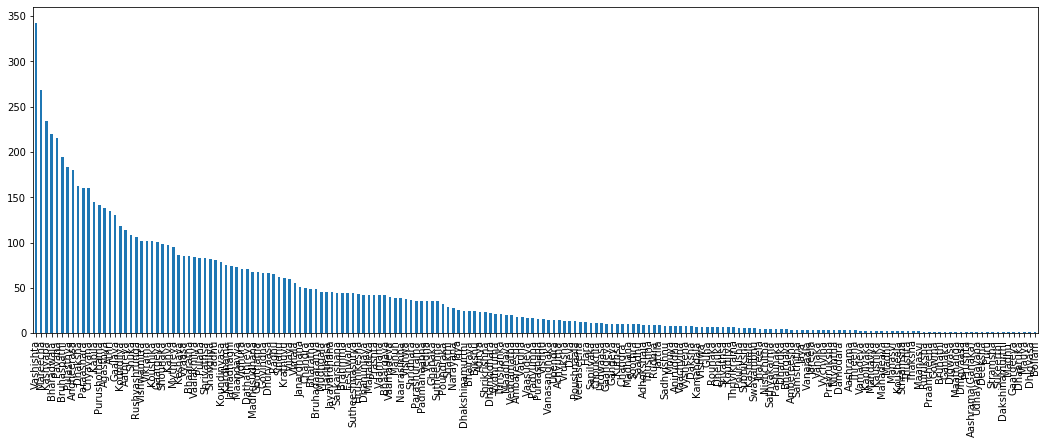

In [28]:
df.Gothram.value_counts().plot(kind='bar')